<a href="https://colab.research.google.com/github/Hamsa-18/TNSIF_AIML_DBIT/blob/main/GAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers

In [ ]:
(x_train, _), (_, _) = tf.keras.datasets.mnist.load_data()
x_train = x_train.reshape(x_train.shape[0], 28 * 28)
x_train = x_train.astype("float32")
x_train = (x_train - 127.5) / 127.5

print("Shape of training data:", x_train.shape)
print("First 5 pixel values of first image:", x_train[0][:5])

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Shape of training data: (60000, 784)
First 5 pixel values of first image: [-1. -1. -1. -1. -1.]


In [ ]:
from tensorflow.keras import Sequential

def make_generator():
    model = Sequential()
    model.add(layers.Dense(128, activation="relu", input_dim=100))
    model.add(layers.Dense(784, activation="tanh"))

    return model
generator = make_generator()
generator.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │        12,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 784)            │       101,136 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 114,064 (445.56 KB)

 Trainable params: 114,064 (445.56 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
def make_discriminator():
    model = Sequential()
    model.add(layers.Dense(128, activation="relu", input_dim=784))
    model.add(layers.Dense(1, activation="sigmoid"))
    model.compile(
        loss="binary_crossentropy",
        optimizer="adam",
        metrics=["accuracy"]
    )

    return model
generator = make_generator()
discriminator = make_discriminator()
discriminator.trainable = False
print("Generator Summary:")
generator.summary()
print("\nDiscriminator Summary:")
discriminator.summary()

Generator Summary:


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 128)            │        12,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 784)            │       101,136 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 114,064 (445.56 KB)

 Trainable params: 114,064 (445.56 KB)

 Non-trainable params: 0 (0.00 B)


Discriminator Summary:


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 100,609 (393.00 KB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 100,609 (393.00 KB)

In [ ]:
from tensorflow.keras import Input, Model
noise_input = Input(shape=(100,))
generated_image = generator(noise_input)
gan_output = discriminator(generated_image)
gan = Model(inputs=noise_input, outputs=gan_output)
gan.compile(loss="binary_crossentropy", optimizer="adam")
print("GAN Summary:")
gan.summary()

GAN Summary:


Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_1 (Sequential)       │ (None, 784)            │       114,064 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_2 (Sequential)       │ (None, 1)              │       100,609 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 214,673 (838.57 KB)

 Trainable params: 114,064 (445.56 KB)

 Non-trainable params: 100,609 (393.00 KB)

In [ ]:
import numpy as np
epochs = 10000
batch_size = 128
sample_interval = 1000
real_label = np.ones((batch_size, 1))
fake_label = np.zeros((batch_size, 1))

for epoch in range(1, epochs + 1):
    idx = np.random.randint(0, x_train.shape[0], batch_size)
    real_imgs = x_train[idx]
    noise = np.random.normal(0, 1, (batch_size, 100))
    fake_imgs = generator.predict(noise, verbose=0)
    d_loss_real = discriminator.train_on_batch(real_imgs, real_label)
    d_loss_fake = discriminator.train_on_batch(fake_imgs, fake_label)
    d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)
    noise = np.random.normal(0, 1, (batch_size, 100))
    g_loss = gan.train_on_batch(noise, real_label)
    if epoch % sample_interval == 0 or epoch == 1:
        print(f"Epoch {epoch}/{epochs} | D loss: {d_loss[0]:.4f}, D acc: {d_loss[1]*100:.2f}% | G loss: {g_loss:.4f}")

/usr/local/lib/python3.12/dist-packages/keras/src/backend/tensorflow/trainer.py:83: UserWarning: The model does not have any trainable weights.
  warnings.warn("The model does not have any trainable weights.")


Epoch 1/10000 | D loss: 1.0809, D acc: 11.91% | G loss: 0.6116
Epoch 1000/10000 | D loss: 6.1018, D acc: 3.69% | G loss: 0.0013
Epoch 2000/10000 | D loss: 6.4640, D acc: 3.71% | G loss: 0.0006
Epoch 3000/10000 | D loss: 6.7263, D acc: 3.71% | G loss: 0.0004
Epoch 4000/10000 | D loss: 6.9406, D acc: 3.74% | G loss: 0.0003
Epoch 5000/10000 | D loss: 7.1268, D acc: 3.75% | G loss: 0.0003
Epoch 6000/10000 | D loss: 7.2943, D acc: 3.75% | G loss: 0.0002
Epoch 7000/10000 | D loss: 7.4492, D acc: 3.75% | G loss: 0.0002
Epoch 8000/10000 | D loss: 7.5943, D acc: 3.75% | G loss: 0.0002
Epoch 9000/10000 | D loss: 7.7321, D acc: 3.74% | G loss: 0.0001
Epoch 10000/10000 | D loss: 7.8635, D acc: 3.74% | G loss: 0.0001


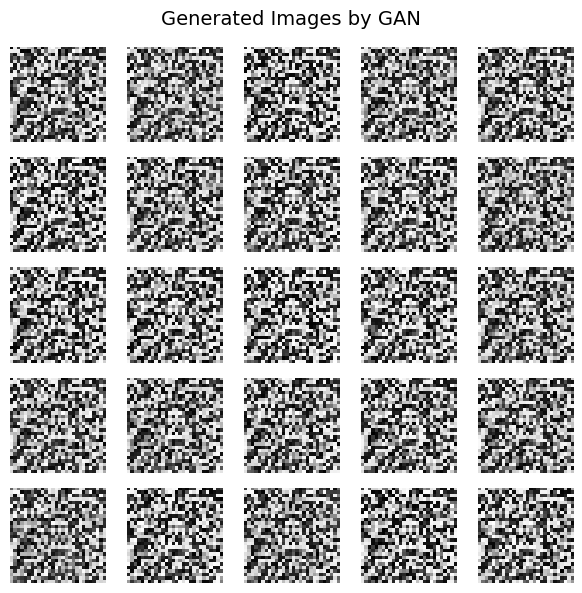

In [ ]:
import matplotlib.pyplot as plt
noise = np.random.normal(0, 1, (25, 100))
generated_images = generator.predict(noise, verbose=0)
generated_images = generated_images.reshape(25, 28, 28)
plt.figure(figsize=(6, 6))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(generated_images[i], cmap='gray')
    plt.axis('off')

plt.suptitle("Generated Images by GAN", fontsize=14)
plt.tight_layout()
plt.show()